In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/amous/Desktop/finalData/data_bts.csv')

In [2]:
data = data.drop('subprofile', axis=1)  # Features (phone number attributes)
data = data.drop('contract_id', axis=1)  # Features (phone number attributes)

In [3]:
for i in data.columns:
    print(i)

dn
profile_id
produit
full_vol
full_secteur
full_city


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture

# Step 3: Prepare Data for Clustering
categorical_cols = data.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_cols:
    data[column] = label_encoder.fit_transform(data[column])


# Exclude 'dn' column from clustering
columns_for_clustering = [col for col in data.columns if (col != 'dn')]
X = data[columns_for_clustering].values

# Step 4: Apply Gaussian Mixture Models (GMM) Clustering
n_components = 1200 # Number of clusters
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X)

# Step 5: Get Cluster Labels
labels = gmm.predict(X)

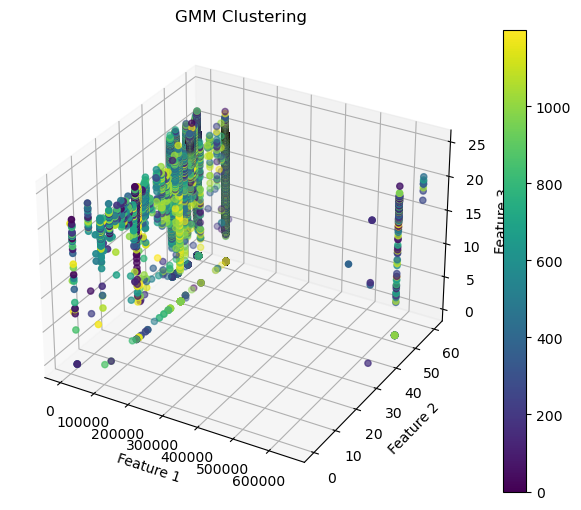

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Step 6: Visualization (assuming 3D data)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points with colors indicating the clusters
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')

# Add a colorbar to show the cluster colors
cbar = plt.colorbar(scatter)

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('GMM Clustering')

plt.show()

In [13]:
from sklearn.metrics import silhouette_score

# Step 6: Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: -0.48733522164851695


C:\Users\amous\AppData\Local\Temp\ipykernel_16212\1022490903.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / n_components)


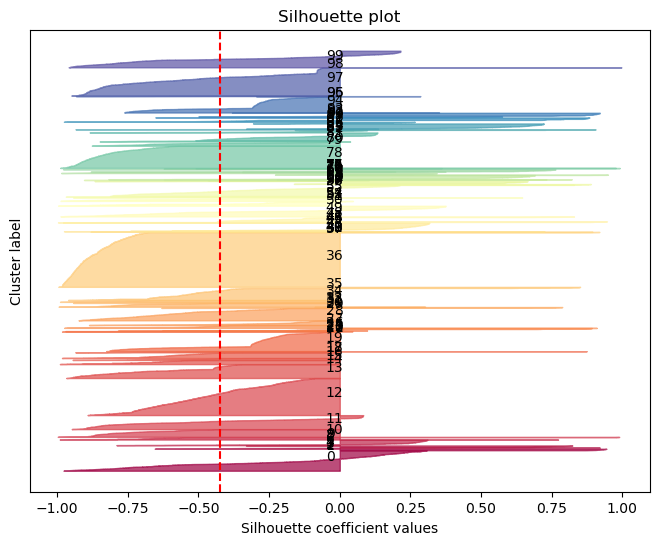

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Calculate the silhouette scores for each sample
silhouette_values = silhouette_samples(X, labels)

# Create a scatter plot of the silhouette scores
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10
for i in range(n_components):
    # Aggregate the silhouette scores for samples in the current cluster
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()

    # Calculate the size of the current cluster
    cluster_size = cluster_silhouette_values.shape[0]
    y_upper = y_lower + cluster_size

    # Plot the silhouette scores for samples in the current cluster
    color = plt.cm.get_cmap("Spectral")(float(i) / n_components)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with cluster numbers
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    
    # Update the lower bound for the next cluster plot
    y_lower = y_upper + 10

# Set plot aesthetics
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
plt.title("Silhouette plot")
plt.show()